Packages load

In [7]:
import numpy as np # Package for scientific computing
import matplotlib.pyplot as plt # Package for plot
#%matplotlib inline
%matplotlib notebook
# import xlrd
import csv

Data load (by excel file)

In [ ]:
# file_location  ='C:\Users\Edgardo\OneDrive\WORK\LAB_Radio\BLACK_CARBON(2015 Expedition)\Processing\Neshybas Standards'
workbook = xlrd.open_workbook(file_location)
sheet = workbook.sheet_by_index(0)
sheet.cell_value(0,3)

Data load (by csv)

In [4]:
# blankdata = np.genfromtxt(blankfilename)
obsdata1 = np.genfromtxt('05ml_I7.prn',)
obsdata2 = np.genfromtxt('200ml blank_I.prn')
# print(obsdata1)
# print(obsdata2)


In [14]:
l=obsdata1[:,0] # wavelentgh
f=obsdata1[:,5] # filter
b=obsdata2[:,5] # blank

subset1 = [i for i in range (26,150)]
ls1 = l[subset1]

Plot the Intensities Spectras

<IPython.core.display.Javascript object>


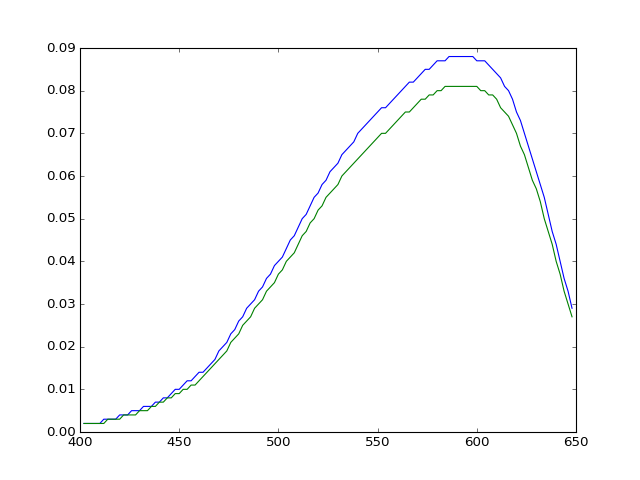

In [15]:
plt.figure()
plt.plot(ls1,b[subset1]) # Blank Spectra
plt.plot(ls1,f[subset1]) # Sample Spectra

Compute and plot the Absorbance

<IPython.core.display.Javascript object>


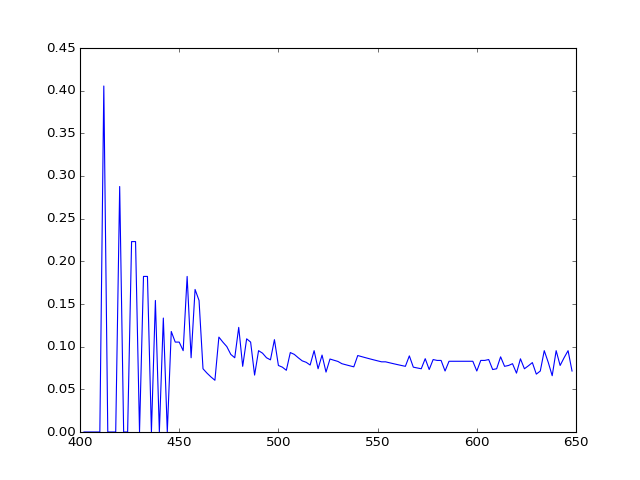

In [16]:
plt.figure()
Ab = -np.log(f[subset1]/b[subset1]) # Absorbance according to Lambert-Beer Law
plt.plot(ls1,Ab)

In [13]:
whos

Variable   Type       Data/Info
-------------------------------
Ab         ndarray    124: 124 elems, type `float64`, 992 bytes
b          ndarray    226: 226 elems, type `float64`, 1808 bytes
csv        module     <module 'csv' from 'C:\\U<...>\Anaconda3\\lib\\csv.py'>
f          ndarray    226: 226 elems, type `float64`, 1808 bytes
l          ndarray    226: 226 elems, type `float64`, 1808 bytes
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
obsdata1   ndarray    226x8: 1808 elems, type `float64`, 14464 bytes
obsdata2   ndarray    226x8: 1808 elems, type `float64`, 14464 bytes
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
subset1    list       n=124


Compute and plot the logarithm of the Absorbance

<IPython.core.display.Javascript object>


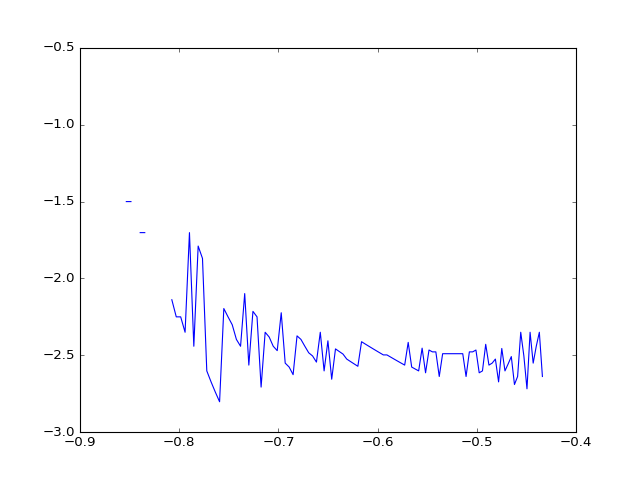

C:\Users\Edgardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [31]:
plt.figure()
l2 = np.log(ls1*0.001) # Logarithm of the wavelenght in micrometers
Ab2 = np.log(Ab) # Logarithm of the Absorbance
plt.plot(l2,Ab2)
plt.show()

In [32]:
ikeep = np.argwhere(np.isinf(Ab2)==False); #print(ikeep)

Select the portion of the curve that you need

<IPython.core.display.Javascript object>


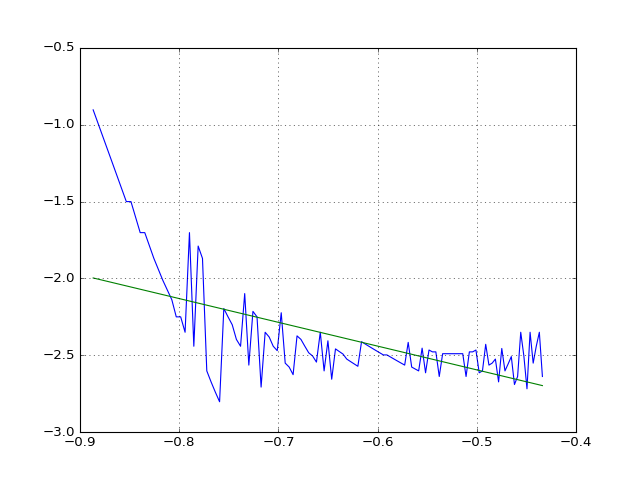

[[-1.54744319]
 [-3.36928288]]
alpha [ 1.54744319]
beta [ 0.03441431]


In [40]:
plt.figure()
# subset = [i for i in range (20,100)] # numbers is for the example
p = np.polyfit(np.squeeze(l2[ikeep]),Ab2[ikeep],1);print(p)
b = np.exp(p[1]) # Beta
print ('alpha', -p[0])
print ('beta', b)
s = np.polyval(p,l2[ikeep]) # Straight
plt.plot(l2[ikeep],Ab2[ikeep])
plt.plot(l2[ikeep],s,'g')
plt.grid('on')

Otros comandos:

In [41]:
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

In [23]:
Ab2

array([       -inf,        -inf,        -inf,        -inf,        -inf,
       -0.90272046,        -inf,        -inf,        -inf, -1.24589932,
              -inf,        -inf, -1.49993999, -1.49993999,        -inf,
       -1.70198336, -1.70198336,        -inf, -1.86982471,        -inf,
       -2.01341868,        -inf, -2.13891103, -2.25036733, -2.25036733,
       -2.35061866, -1.70198336, -2.4417164 , -1.78943766, -1.86982471,
       -2.60223217, -2.67375209, -2.74049301, -2.80305417, -2.19619439,
       -2.25036733, -2.30175086, -2.39720595, -2.4417164 , -2.09880932,
       -2.56445594, -2.2145807 , -2.25036733, -2.70767965, -2.35061866,
       -2.38191709, -2.4417164 , -2.47032483, -2.22364837, -2.55153963,
       -2.57720739, -2.62664541, -2.37418397, -2.39720595, -2.4417164 ,
       -2.48432751, -2.50497021, -2.54501831, -2.35061866, -2.60223217,
       -2.40626816, -2.6563463 , -2.4589796 , -2.47594948, -2.49263585,
       -2.52519494, -2.54108498, -2.55672621, -2.57212633, -2.41